In [204]:
##load data
import prepare
import importlib
path = 'data/business.xls'
business = prepare.loadDataSet(path)

In [202]:
test = pd.read_excel(path)

In [203]:
test.head()

,用户编号,车辆编号,开始时间,结束时间,花费金额,实际支付金额,优惠金额,开始纬度,开始经度,结束纬度,结束经度
0,10043,90,9/28/2015 13:03:20,9/28/2015 13:36:04,80,0,0,31.825016,119.998132,31.825208,119.998005
1,10041,89,9/28/2015 12:48:27,9/28/2015 13:59:40,160,0,0,31.825028,119.998074,31.825097,119.998017
2,10046,79,9/28/2015 13:38:11,9/28/2015 14:48:32,160,0,0,31.824956,119.997859,31.825067,119.997897
3,10059,86,9/28/2015 14:47:54,9/28/2015 15:13:21,60,0,0,31.825093,119.998124,31.825201,119.998015
4,726,86,9/29/2015 09:19:11,9/29/2015 09:19:17,1,0,0,31.825090,119.997652,0.000000,0.000000


In [276]:
business.tail(7)

,开始时间,rentNumber,week
711,2017-10,4,星期二
712,2017-10,11,星期三
713,2017-10,1,星期四
714,2017-10,9,星期五
715,2017-10,21,星期六
716,2017-10,17,星期天
717,2017-10,1,星期一


In [207]:
##get daylist
importlib.reload(prepare)
datelist = prepare.get_datelist('2015-09-28','2017-10-16')

In [208]:
len(datelist)-len(business)

32

In [209]:
import pandas as pd
new_business = pd.merge(datelist,business,how='outer')
new_business.fillna(0,inplace = 'true')
print(new_business[new_business['rentNumber']==0])

           开始时间  rentNumber week
85   2015-12-22         0.0    0
117  2016-01-23         0.0    0
118  2016-01-24         0.0    0
126  2016-02-01         0.0    0
132  2016-02-07         0.0    0
147  2016-02-22         0.0    0
156  2016-03-02         0.0    0
191  2016-04-06         0.0    0
268  2016-06-22         0.0    0
389  2016-10-21         0.0    0
394  2016-10-26         0.0    0
395  2016-10-27         0.0    0
408  2016-11-09         0.0    0
409  2016-11-10         0.0    0
414  2016-11-15         0.0    0
416  2016-11-17         0.0    0
420  2016-11-21         0.0    0
421  2016-11-22         0.0    0
422  2016-11-23         0.0    0
423  2016-11-24         0.0    0
436  2016-12-07         0.0    0
450  2016-12-21         0.0    0
451  2016-12-22         0.0    0
455  2016-12-26         0.0    0
465  2017-01-05         0.0    0
472  2017-01-12         0.0    0
511  2017-02-20         0.0    0
513  2017-02-22         0.0    0
541  2017-03-22         0.0    0
603  2017-

In [210]:
new_business[new_business['rentNumber']==0]

,开始时间,rentNumber,week
85,2015-12-22,0.0,0
117,2016-01-23,0.0,0
118,2016-01-24,0.0,0
126,2016-02-01,0.0,0
132,2016-02-07,0.0,0
147,2016-02-22,0.0,0
156,2016-03-02,0.0,0
191,2016-04-06,0.0,0
268,2016-06-22,0.0,0
389,2016-10-21,0.0,0


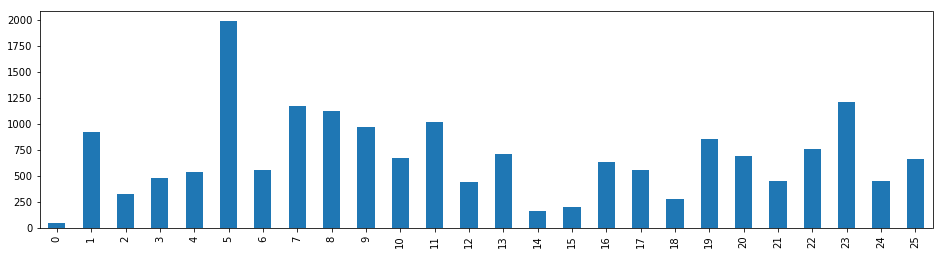

In [215]:
##get daylist
importlib.reload(prepare)
df = prepare.month_data(business)
prepare.plot_monthdata(df)

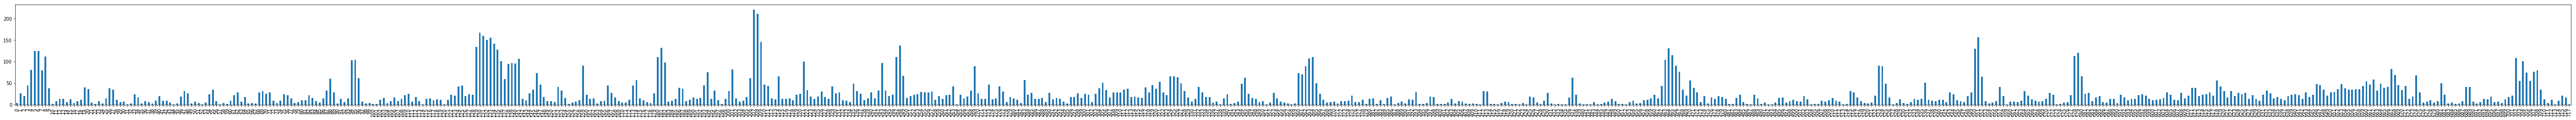

In [216]:
prepare.plot_daydata(business)

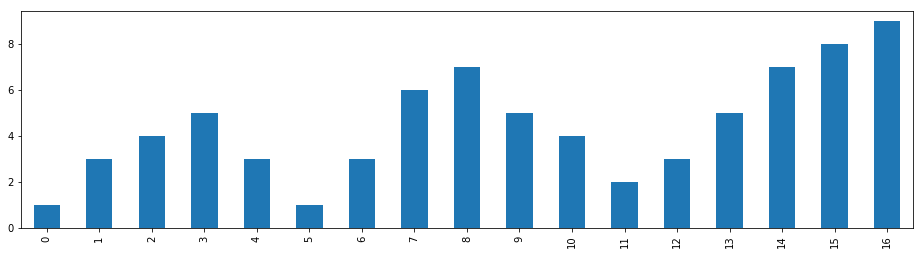

In [222]:
##generate data
data_list =  [1,3,4,5,3,1,3,6,7,5,4,2,3,5,7,8,9]
gen = pd.DataFrame({'rentNumber':data_list})
prepare.plot_monthdata(gen)

In [223]:
import numpy as np
business_copy = business.copy()
business_copy['rentNumber'] = np.log(business_copy.rentNumber)

In [224]:
##stationarity test,测试样本7
prepare.stationarity_test(business_copy,7)

原始序列经过0阶差分后归于平稳，p值为0.00469951067314


In [225]:
##whitenoise_test
prepare.whitenoise_test(business_copy,7)

原始序列为非白噪声序列，对应的p值为：7.81474158571e-60
一阶差分序列为非白噪声序列，对应的p值为：0.000493556298573


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


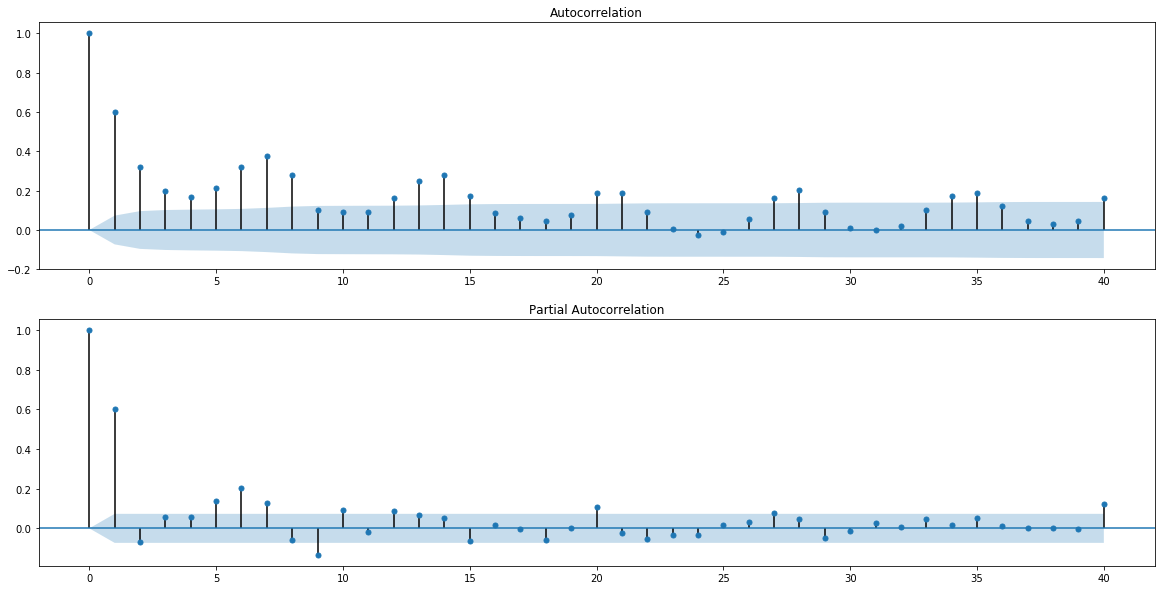

In [264]:
##acf、pacf
importlib.reload(prepare)
prepare.plot_acfandpacf(business_copy)

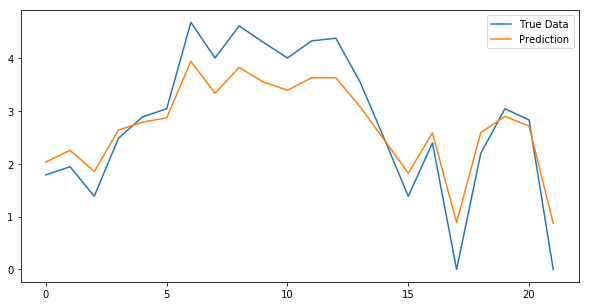

In [291]:
##predict
importlib.reload(prepare)
import numpy as np
pred, RMSE=prepare.arma_predict(business_copy,21)

In [292]:
np.exp(pred).astype(int)

array([ 7,  9,  6, 14, 16, 17, 51, 28, 46, 34, 29, 37, 37, 21, 11,  6, 13,
        2, 13, 18, 15,  2])

In [293]:
RMSE

0.53236883500699539